# Churn analysis using Apriori Algorithm

In [1]:
library(arules)
library(arulesViz)

Warning message:
"package 'arules' was built under R version 4.0.2"
Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Warning message:
"package 'arulesViz' was built under R version 4.0.2"
Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



In [2]:
churn <- read.csv("C:/Users/Thomas/Documents/BIDS/ML/telecom-customer-churn-modified.csv")
summary(churn)

  customerID           Churn              gender          SeniorCitizen     
 Length:7043        Length:7043        Length:7043        Length:7043       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Partner           Dependents            tenure      PhoneService      
 Length:7043        Length:7043        Min.   : 0.00   Length:7043       
 Class :character   Class :character   1st Qu.: 9.00   Class :character  
 Mode  :character   Mode  :character   Median :29.00   Mode  :character  
                                       Mean   :32.37                     
              

In [4]:

### import as transaction for Apriory
suppressWarnings(
churn2 <- read.transactions("C:/Users/Thomas/Documents/BIDS/ML/telecom-customer-churn-modified.csv", 
                            header = T,sep=",",format="basket" )
)
class(churn2)
length(churn2)

[1] "transactions"
attr(,"package")
[1] "arules"

[1] 12944

In [6]:
# inspect(churn2)
inspect(churn2[1:5])

    items                                                                                                                                                                                                                          
[1] {7590-VHVEG,                                                                                                                                                                                                                   
     Female,                                                                                                                                                                                                                       
     NonChurning,                                                                                                                                                                                                                  
     NonSeniorCitizen}                                                                  

In [7]:
items <- itemFrequency(churn2)
head(items)

0002-ORFBO   0003-MKNFE   0004-TLHLJ   0011-IGKFF   0013-EXCHZ   0013-MHZWF 
7.725587e-05 7.725587e-05 7.725587e-05 7.725587e-05 7.725587e-05 7.725587e-05

### Check the results of the Apriory algorithm

In [8]:
itemsets <- apriori(data = churn2, parameter = list(minlen=1,maxlen=5,support=0.001,target="frequent itemsets"))
itemsets

inspect(head(sort(itemsets, by="support"),40))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen            target  ext
      5 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[14746 item(s), 12944 transaction(s)] done [0.03s].
sorting and recoding items ... [83 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5

Warning message in apriori(data = churn2, parameter = list(minlen = 1, maxlen = 5, :
"Mining stopped (maxlen reached). Only patterns up to a length of 5 returned!"


 done [0.06s].
sorting transactions ... done [0.00s].
writing ... [176776 set(s)] done [0.04s].
creating S4 object  ... done [0.05s].


set of 176776 itemsets 

     items                                  support    transIdenticalToItemsets
[1]  {NonSeniorCitizen}                     0.45588690 0.0000000               
[2]  {NonChurning}                          0.39972188 0.0000000               
[3]  {NonChurning,NonSeniorCitizen}         0.34826947 0.0000000               
[4]  {Male}                                 0.27464462 0.0000000               
[5]  {Female}                               0.26946848 0.0000000               
[6]  {Male,NonSeniorCitizen}                0.23029975 0.0000000               
[7]  {Female,NonSeniorCitizen}              0.22558714 0.0000000               
[8]  {Male,NonChurning}                     0.20279666 0.0000000               
[9]  {Female,NonChurning}                   0.19692522 0.0000000               
[10] {Male,NonChurning,NonSeniorCitizen}    0.17668418 0.1766842               
[11] {Female,NonChurning,NonSeniorCitizen}  0.17158529 0.1715853               
[12] {Churning}                         

### Check the results of the association rules for the consequent "Churning"

In [9]:
rules <- apriori(data = churn2, parameter = list(support=0.01, confidence=0.10,target="rules"),
                 appearance= list(default="lhs",rhs="Churning"))

rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[14746 item(s), 12944 transaction(s)] done [0.02s].
sorting and recoding items ... [34 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = churn2, parameter = list(support = 0.01, confidence = 0.1, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.10s].
writing ... [7676 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


set of 7676 rules 

In [10]:
inspect(head(sort(rules, by="lift"),15))

     lhs                   rhs           support confidence   coverage     lift count
[1]  {Electronic check,                                                              
      Fiber optic,                                                                   
      Month-to-month,                                                                
      MultipleLines,                                                                 
      NoDependents,                                                                  
      NoTechSupport,                                                                 
      NpOnlineSecurity,                                                              
      PaperlessBilling} => {Churning} 0.01143387  0.7437186 0.01537392 5.150719   148
[2]  {Electronic check,                                                              
      Fiber optic,                                                                   
      Month-to-month,                                 

### Check the results of the association rules for the consequent "NonChurning"

In [11]:
rules2 <- apriori(data = churn2, parameter = list(support=0.01, confidence=0.10,target="rules"),
                 appearance= list(default="lhs",rhs="NonChurning"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 129 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[14746 item(s), 12944 transaction(s)] done [0.02s].
sorting and recoding items ... [34 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(data = churn2, parameter = list(support = 0.01, confidence = 0.1, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.10s].
writing ... [2989 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [12]:
inspect(head(sort(rules2, by="lift"),15))

     lhs                   rhs              support confidence   coverage     lift count
[1]  {Two year}         => {NonChurning} 0.01073857  0.9586207 0.01120210 2.398219   139
[2]  {Senior,                                                                           
      Two year}         => {NonChurning} 0.01073857  0.9586207 0.01120210 2.398219   139
[3]  {OnlineBackup,                                                                     
      OnlineSecurity}   => {NonChurning} 0.01112485  0.8622754 0.01290173 2.157189   144
[4]  {OnlineBackup,                                                                     
      OnlineSecurity,                                                                   
      Senior}           => {NonChurning} 0.01112485  0.8622754 0.01290173 2.157189   144
[5]  {OnlineBackup,                                                                     
      OnlineSecurity,                                                                   
      PhoneService}  

Warning message:
"plot: Too many rules supplied. Only plotting the best 100 rules using 'support' (change control parameter max if needed)"


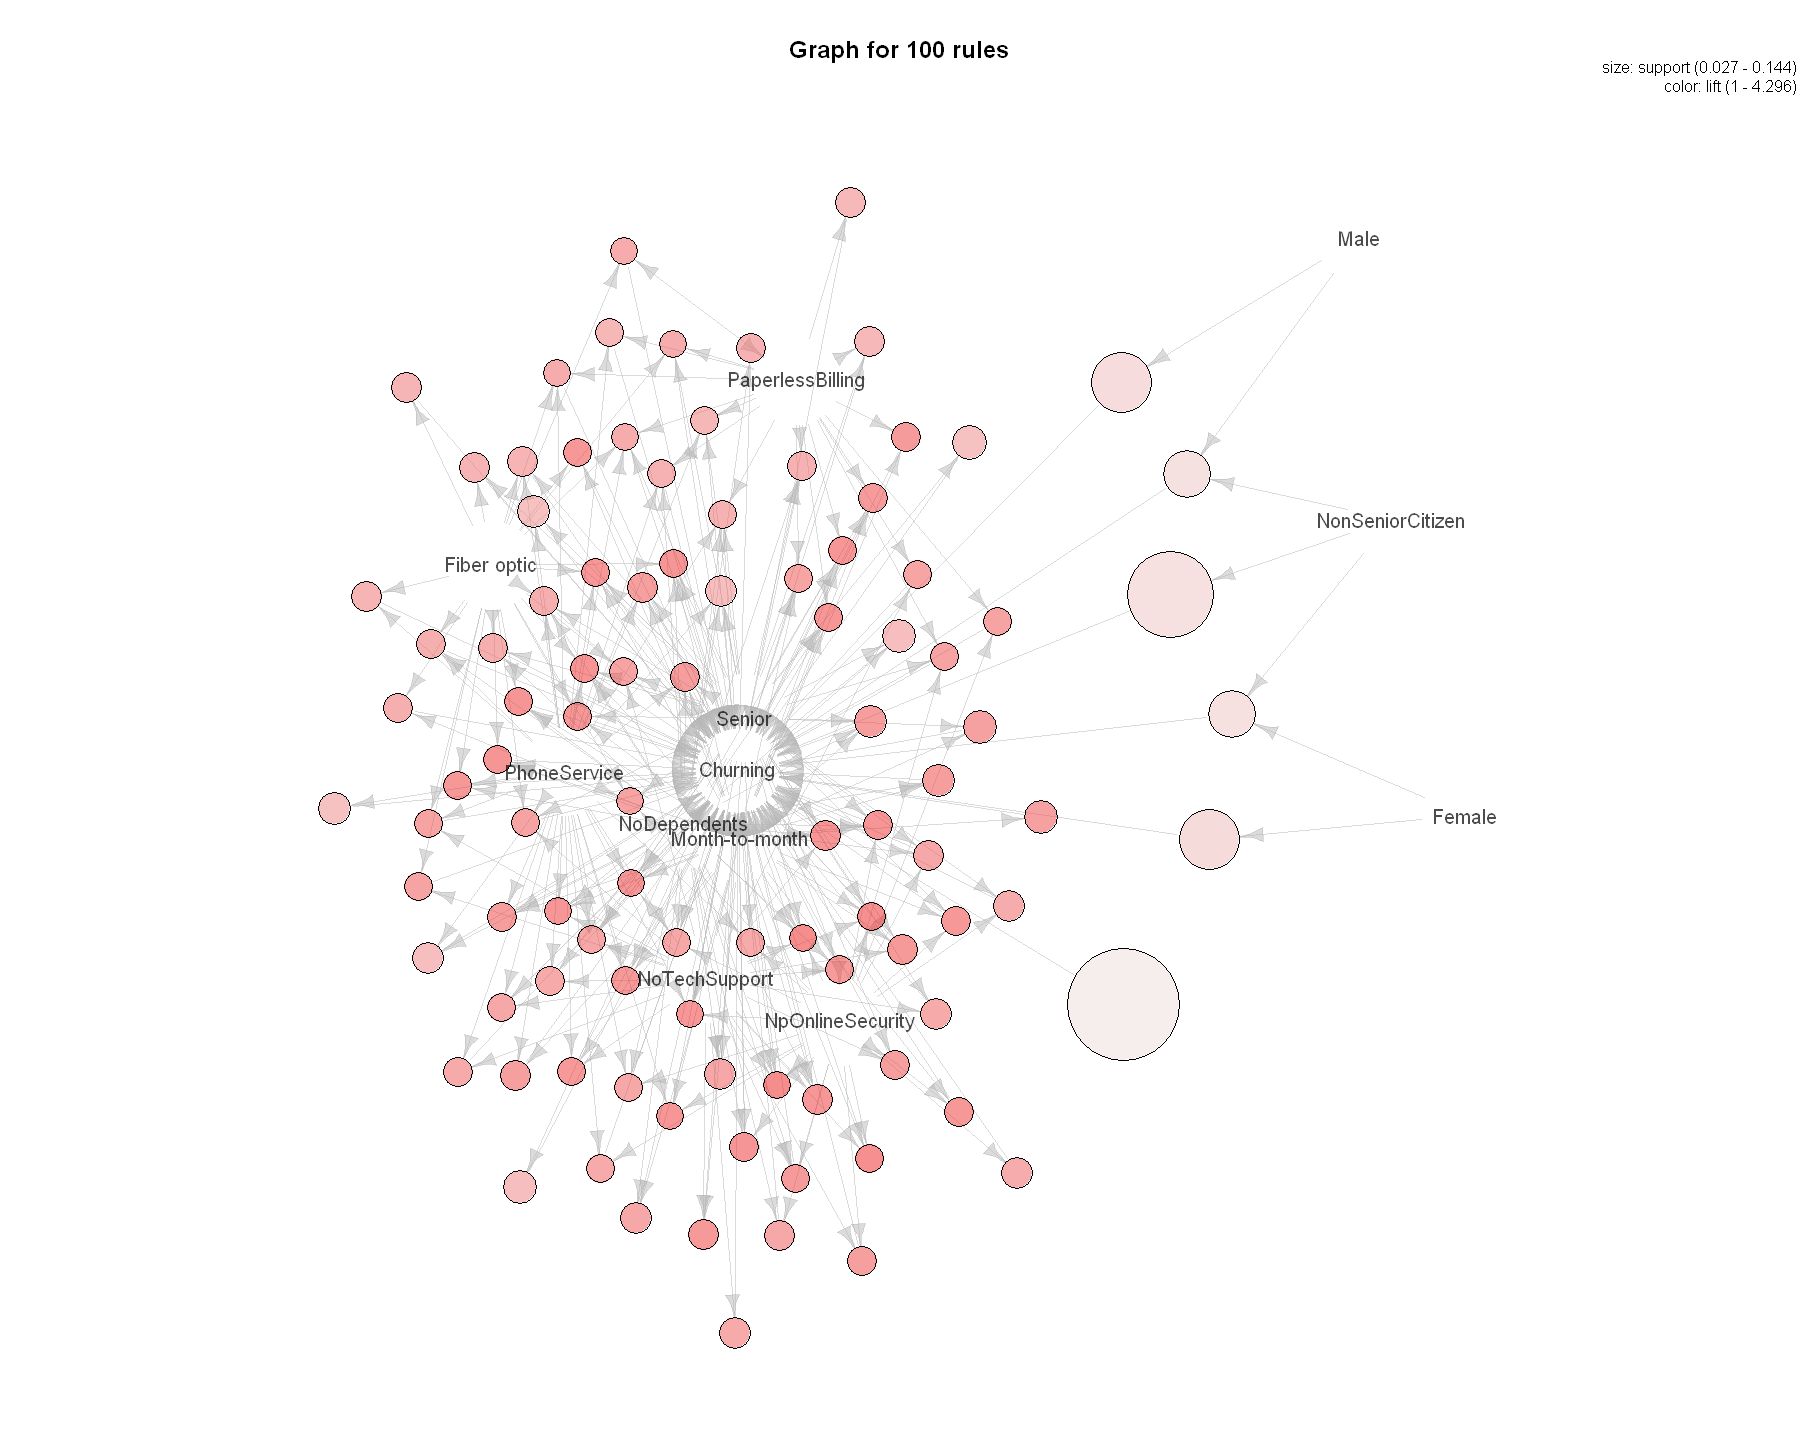

In [15]:
options(repr.plot.width = 15, repr.plot.height = 12)
plot(rules, method="graph")

Warning message:
"plot: Too many rules supplied. Only plotting the best 100 rules using 'support' (change control parameter max if needed)"


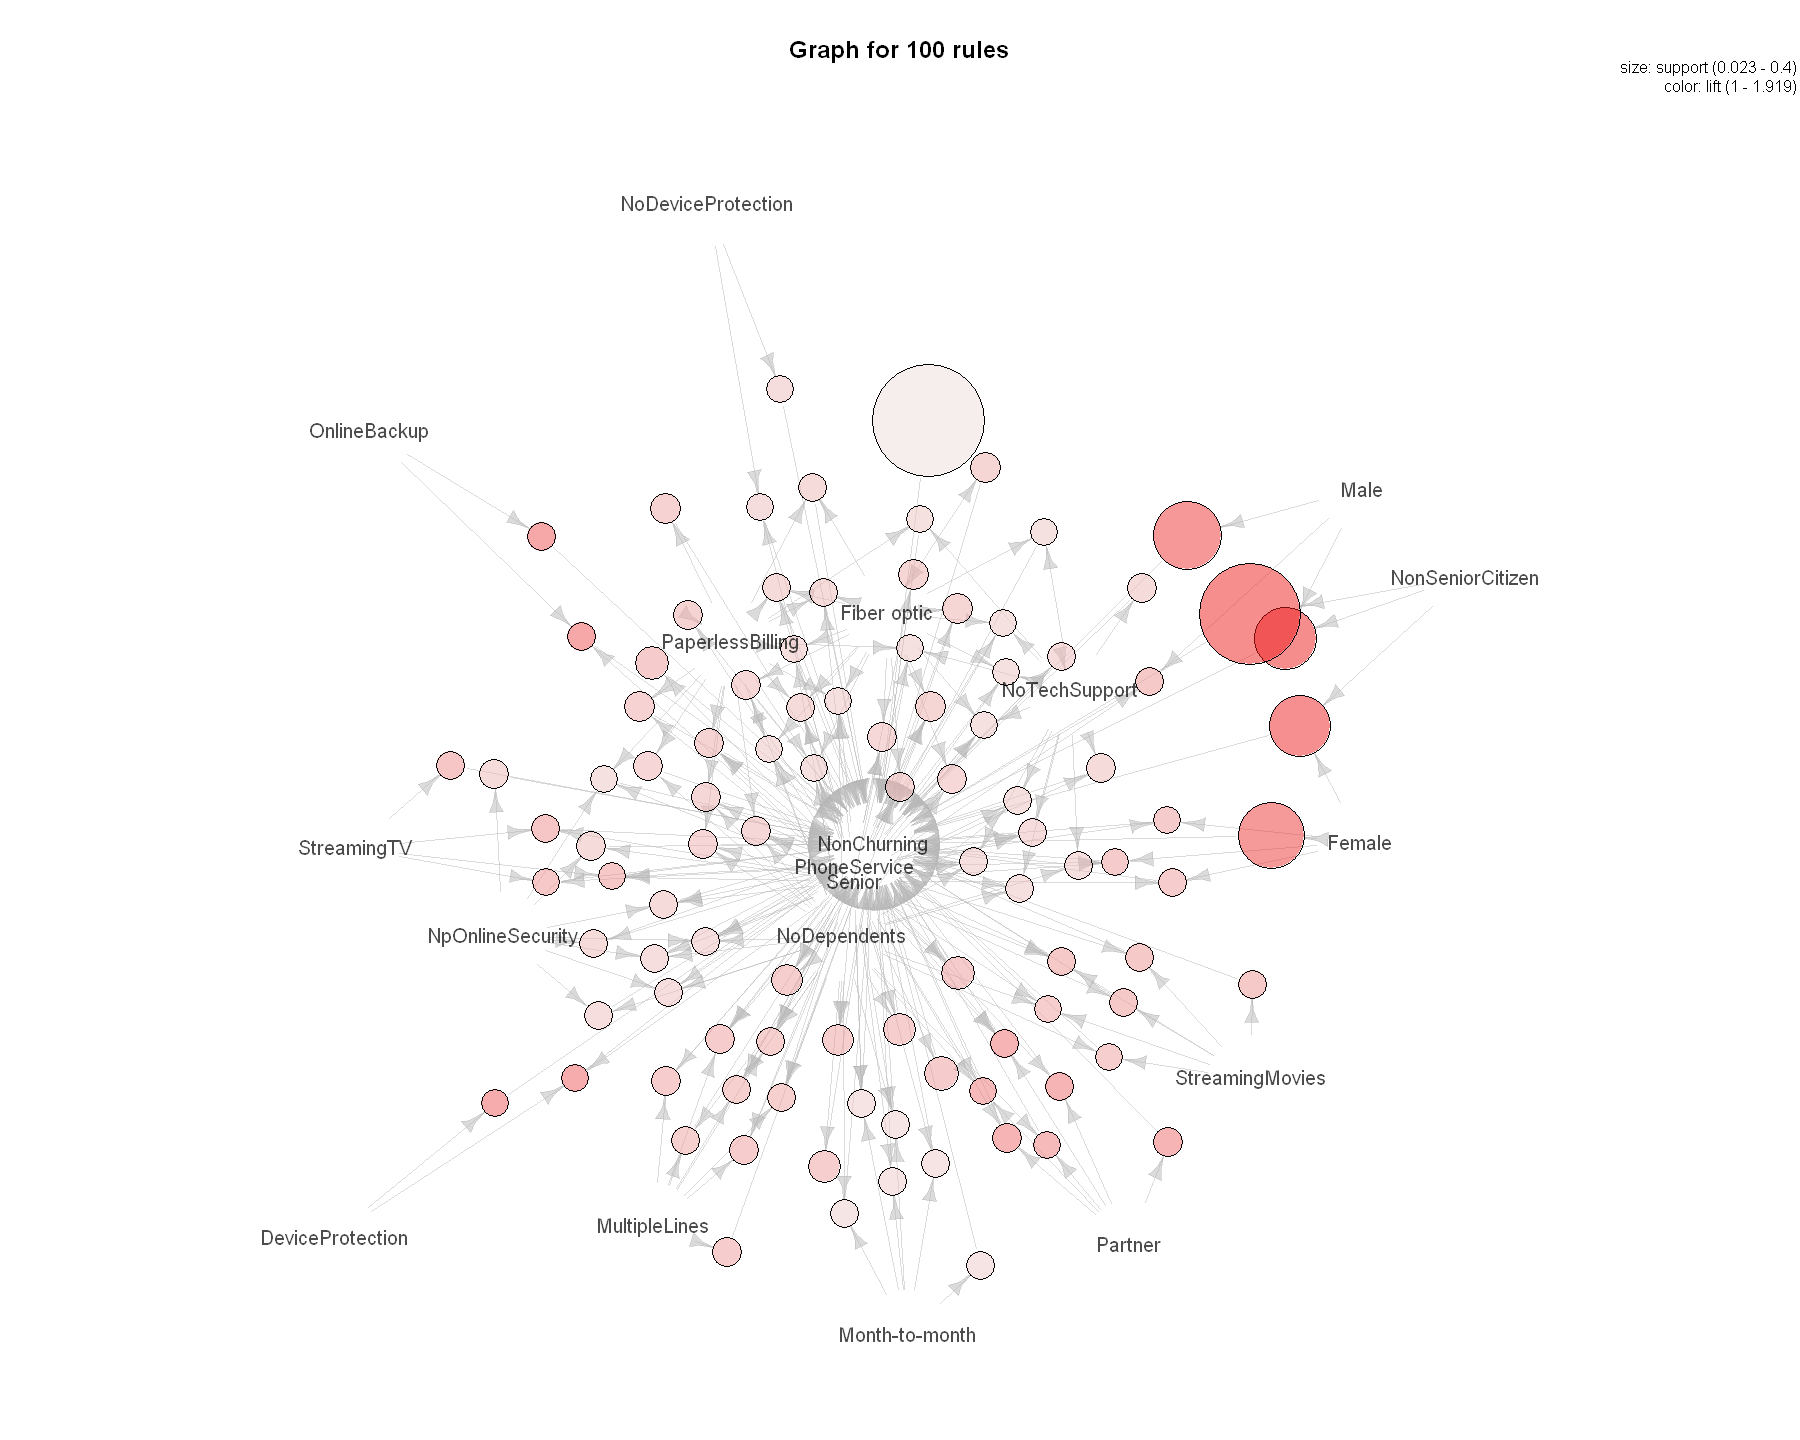

In [19]:
options(repr.plot.width = 15, repr.plot.height = 12)
plot(rules2, method="graph")